# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [25]:
# Importing relevant packages

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA

aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [6]:
aqi[['arithmetic_mean','aqi']].describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [7]:
aqi.dtypes

Unnamed: 0            int64
date_local           object
state_name           object
county_name          object
city_name            object
local_site_name      object
parameter_name       object
units_of_measure     object
arithmetic_mean     float64
aqi                   int64
dtype: object

**Question:** What time range does this data cover?

In [11]:
aqi['date_local'].unique()

array(['2018-01-01'], dtype=object)

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [12]:
aqi['aqi'].min(),aqi['aqi'].max()

(0, 50)

**Question:** Are all states equally represented in the dataset?

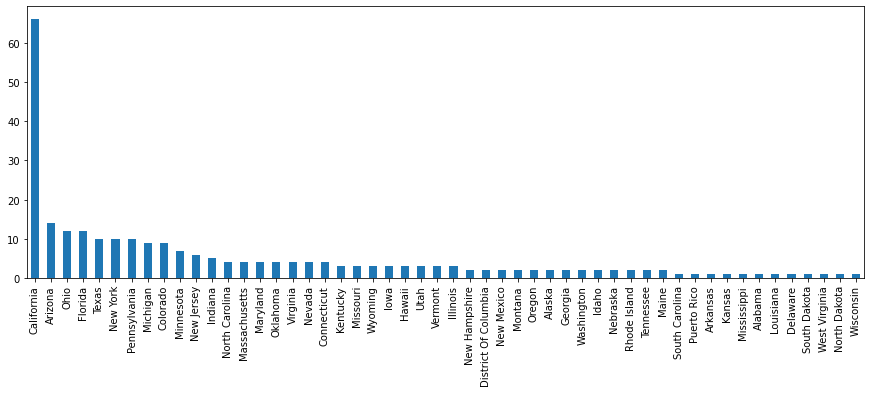

In [19]:
aqi['state_name'].value_counts().plot(kind='bar',figsize=(15,5))
plt.show()

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [27]:
# Summarize the mean AQI for RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']


In [30]:
rre_df = aqi[aqi['state_name'].isin(rre_states)]
rre_df.shape

(119, 10)

In [33]:
rre_df['state_name'].unique()

array(['Ohio', 'Pennsylvania', 'California', 'Texas', 'Florida',
       'Michigan'], dtype=object)

In [31]:
rre_df['aqi'].mean()

8.697478991596638

In [58]:
rre_df.groupby(['state_name'])[['aqi']].agg('mean').rename(columns={'aqi':'mean_aqi'})

,mean_aqi
state_name,
California,12.121212
Florida,5.500000
Michigan,8.111111
Ohio,3.333333
Pennsylvania,2.900000
Texas,2.700000


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

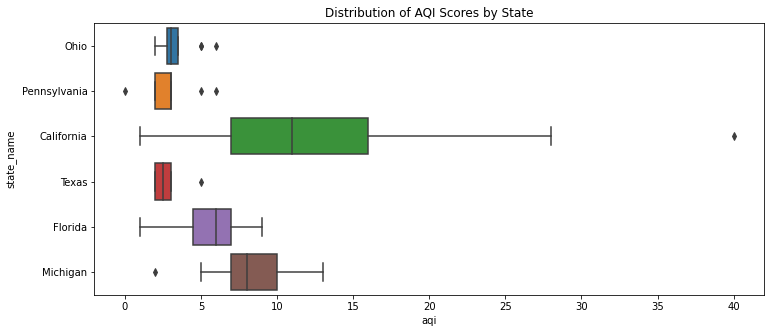

In [48]:
plt.figure(figsize=(12,5))
sns.boxplot(x='aqi',y='state_name',data=rre_df).set(title='Distribution of AQI Scores by State')
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

- Standouts

- California has the highest mean which is well above 10 hence would be affected by the subsidy.
- Michigan; Despite having a less then 10 mean, some of it's values range well over 10 as well.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [67]:
# Find the mean aqi for your state.

cal_df = rre_df[rre_df['state_name']=='California']
sample_mean = cal_df['aqi'].mean()
sample_mean


12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [65]:
confidence_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [71]:
# calculating the standard error

# standard deviation / sqrt(sample size)

std_error = cal_df['aqi'].std() / np.sqrt(len(cal_df))
std_error

0.8987209641127412

In [72]:
# Calculate your margin of error.

# z_score of 95% level

z_score = 1.96

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = std_error * z_score
margin_of_error

1.7614930896609726

### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [73]:
# Calculate your confidence interval (upper and lower limits).

lower_limit = sample_mean - margin_of_error

upper_limit = sample_mean + margin_of_error

print(f'Lower limit value : {lower_limit}')
print(f'Upper limit value : {upper_limit}')

Lower limit value : 10.359719031551148
Upper limit value : 13.882705210873095


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [77]:
(upper_value, lower_value) = stats.norm.interval(alpha = 0.95,loc=sample_mean,scale=std_error)
print(f'Lower limit value : {upper_value}')
print(f'Upper limit value : {lower_value}')

Lower limit value : 10.359751399400034
Upper limit value : 13.882672843024208


In [80]:
# Shifting the confidence level to 99%

(upper_value, lower_value) = stats.norm.interval(alpha = 0.99,loc=sample_mean,scale=std_error)
print(f'Lower limit value : {upper_value}')
print(f'Upper limit value : {lower_value}')

Lower limit value : 9.806260326136803
Upper limit value : 14.43616391628744


# Considerations

**What are some key takeaways that you learned from this lab?**

- California and Michigan appear to be the states that would be affected by the policy.
- California stood out more given the mean was well over 10 unlike in Michigan.
- A confidence interval was used to calculate the sample mean AQI with a certain degree of confidence.

**What findings would you share with others?**

- The confidence intervals at both confidence levels( 95% and 99%) given the lower range fell below 10 while using a confidence level of 99% but remained above 10 in the 95% confidence interval. 

**What would you convey to external stakeholders?**

- Explain the statistical significance.
- Explain why we highlighted California and Michigan states and the indepth analysis on California using different confidence levels

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.